# Unsupervised Learning and Clustering in R

We'll start by generating some simulated data. We create a matrix with 20 entries and 5 rows. Suppose each row represents a patient and each column (there are four) represents an expression level of a gene.

In [1]:
#create a matrix that has 5 rows. Because we have 20 entries, R puts them in 4 columns
x <- matrix(rnorm(20), nrow=5) 

# name the columns
colnames(x) <- paste("Gene", 1:4)

#name the rows

rownames(x) <- paste("Patient", 1:5)

print(x)

# multiply the rows by constants to simulate different scaling
x <- matrix(rep(c(1,2,10,100), 5), nrow=5, byrow = TRUE) * x
x

              Gene 1     Gene 2     Gene 3     Gene 4
Patient 1 -1.8385350  1.5625230 -1.7602691  0.7063147
Patient 2 -0.2915563  0.4080427 -0.3852181  1.0060982
Patient 3  0.2818974 -0.2378706  0.4728442  0.4075591
Patient 4 -0.1666429 -0.2967625 -0.3313163 -0.9914050
Patient 5  0.7207408 -1.0390988  0.1136483 -2.6097433


Gene 1     Gene 2     Gene 3     Gene 4
Patient 1 -1.8385350  3.1250460 -17.602691   70.63147
Patient 2 -0.2915563  0.8160855  -3.852181  100.60982
Patient 3  0.2818974 -0.4757412   4.728442   40.75591
Patient 4 -0.1666429 -0.5935249  -3.313163  -99.14050
Patient 5  0.7207408 -2.0781977   1.136483 -260.97433

[1] -0.707671328  0.241445669  0.493063398  0.030448162 -0.746375046
  [6] -0.260358540  1.796502193 -2.139060536 -0.653379836  1.764958511
 [11] -1.877132831  0.475686675 -0.051724926 -0.934584548  0.293286106
 [16] -1.457268321 -0.070967287 -1.835360924 -0.408761532  0.168579283
 [21]  0.165353410 -0.424980262 -0.291032556 -0.784701329  1.622547157
 [26] -1.818480641 -0.205190876  0.807865816 -0.325424352  0.303687606
 [31] -0.484562710  1.683776651 -0.414823203 -1.093916159  1.344792540
 [36] -1.723386366 -1.443056849  0.078270429 -0.812888056 -0.448005798
 [41]  0.713851281 -0.009028000  1.608215929  1.415411815  0.058453507
 [46]  0.335206405 -0.280164089 -1.586644482 -0.784448527  0.862394238
 [51] -0.007967833  0.796475195  0.056104277  0.337749487  0.226318033
 [56] -2.102253132  0.742063791  0.116017240  0.264929315  0.799386557
 [61]  0.837101751 -0.548495615  0.629300146  0.660467787 -0.464659205
 [66] -0.249514026 -1.630601051  0.453555268  1.095020642  0.586971414
 [71]  1.416789163  1.576279979 -0.249813908  0.436152545 -0.675763194
 [76] -1.262053618 -0.760764900 -0.532559635  0.968651545 -1.148143199
 [81] -1.059853441 -1.154750560  1.577308835 -0.805418644 -0.339858861
 [86]  1.278007285 -0.689596590  1.803740992  0.527049237  0.781328228
 [91]  0.026529456 -1.233095391  0.176251889  0.613539550  2.448989641
 [96] -0.701671296  1.291619552 -0.109387845  1.422928164 -1.132582086

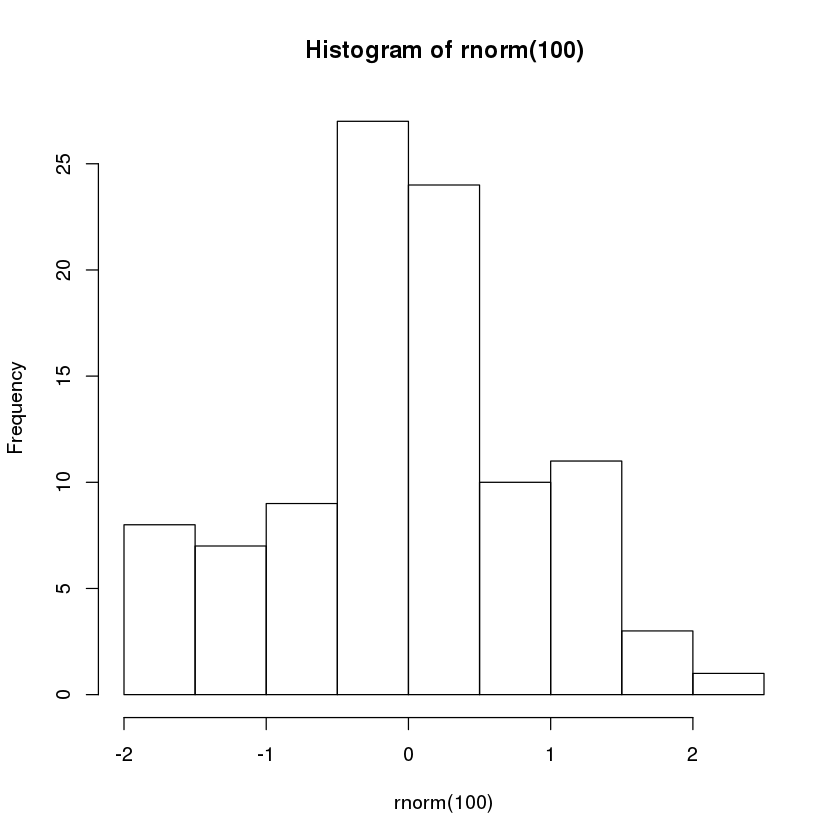

In [3]:
hist(rnorm(100))
rnorm(100)

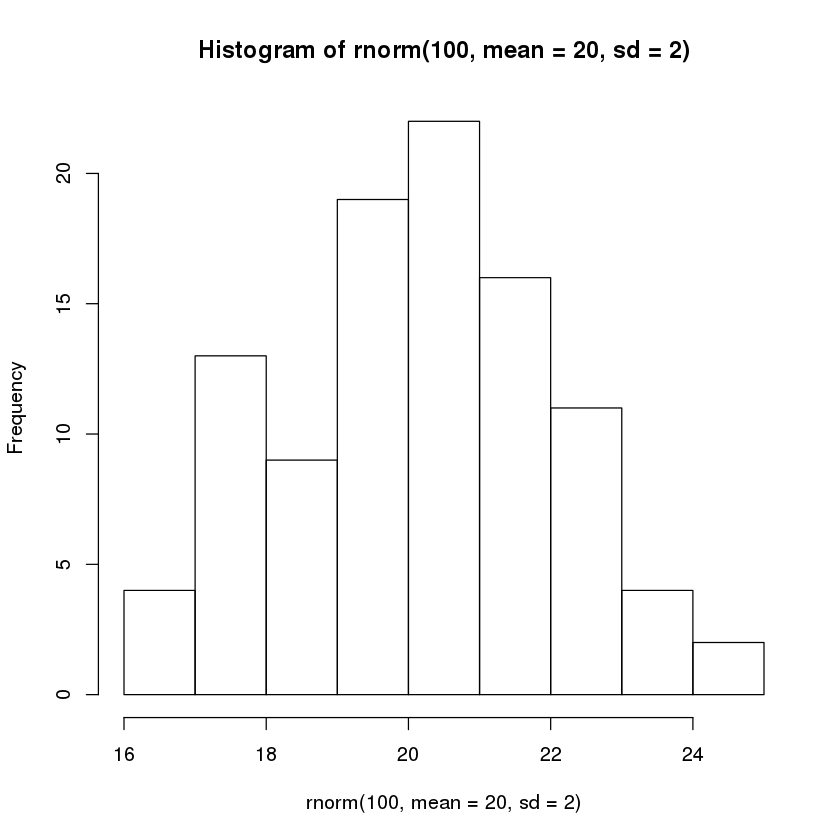

In [5]:
hist(rnorm(100,mean=20,sd=2))

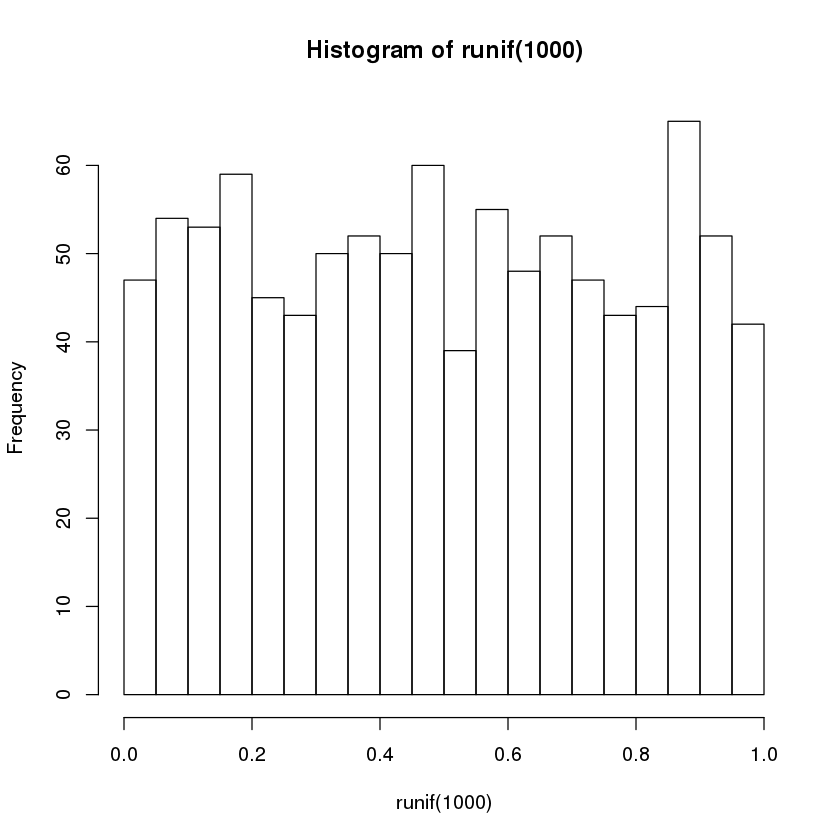

In [9]:
hist(runif(1000),breaks=20)

#### Pairwise distances

In [2]:
dist(x, method = "euclidean", upper = FALSE) # R function calculates pairwise 'distances' between patients.

          Patient 1 Patient 2 Patient 3 Patient 4
Patient 2  20.01285                              
Patient 3  68.35079  48.46356                    
Patient 4  31.58569  51.59296  99.83411          
Patient 5 202.13917 222.07861 270.39283 170.67222

#### Scaling

In [3]:
# Notice the large variation in the magnitudes of the distances. We need to scale the gene expressions:

y <- scale(x, center = TRUE, scale = TRUE) 
y

# Now recalculate the distances
dist(y, method = "euclidean", upper = FALSE)

Gene 1     Gene 2     Gene 3      Gene 4
Patient 1  0.73169781  0.1434364  0.4283350 -0.28141429
Patient 2 -0.09768577  0.7549882  0.5399375 -0.47472221
Patient 3 -1.17170634 -1.1439855  0.5215209 -0.94287342
Patient 4  1.25312925 -0.8947081  0.2903014  0.02393934
Patient 5 -0.71543494  1.1402690 -1.7800948  1.67507058
attr(,"scaled:center")
      Gene 1       Gene 2       Gene 3       Gene 4 
  0.03879986   1.18961173   6.78904082 -67.13895308 
attr(,"scaled:scale")
    Gene 1     Gene 2     Gene 3     Gene 4 
  1.181731   1.850082   3.953728 103.213086

          Patient 1 Patient 2 Patient 3 Patient 4
Patient 2  1.054370                              
Patient 3  2.393035  2.231396                    
Patient 4  1.209102  2.203901  2.632519          
Patient 5  3.434074  3.245645  4.192501  3.876745

In [4]:
apply(y, MARGIN = 2, FUN = mean)

Gene 1        Gene 2        Gene 3        Gene 4 
-2.775558e-17 -2.775558e-17 -6.661338e-17  2.081668e-18

In [5]:
apply(y, 2, sd)

Gene 1 Gene 2 Gene 3 Gene 4 
     1      1      1      1

#### Pairwise distances

In [6]:
dist(y)

          Patient 1 Patient 2 Patient 3 Patient 4
Patient 2  1.054370                              
Patient 3  2.393035  2.231396                    
Patient 4  1.209102  2.203901  2.632519          
Patient 5  3.434074  3.245645  4.192501  3.876745

Dimension reduction
----

### Principal Components Analysis (PCA)

In [7]:
head(iris, 3)

Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1          5.1         3.5          1.4         0.2  setosa
2          4.9         3.0          1.4         0.2  setosa
3          4.7         3.2          1.3         0.2  setosa

In [8]:
ir <- iris[,1:4] #Select the first 4 columns

In [9]:
ir.pca <- prcomp(ir,
                 center = TRUE,
                 scale. = TRUE) # This calls the pca function and stores the result in ir.pca. 
                                # The options just center so that mean is zero and 
                                # scale so that the variance is one.

In [10]:
summary(ir.pca)

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7084 0.9560 0.38309 0.14393
Proportion of Variance 0.7296 0.2285 0.03669 0.00518
Cumulative Proportion  0.7296 0.9581 0.99482 1.00000

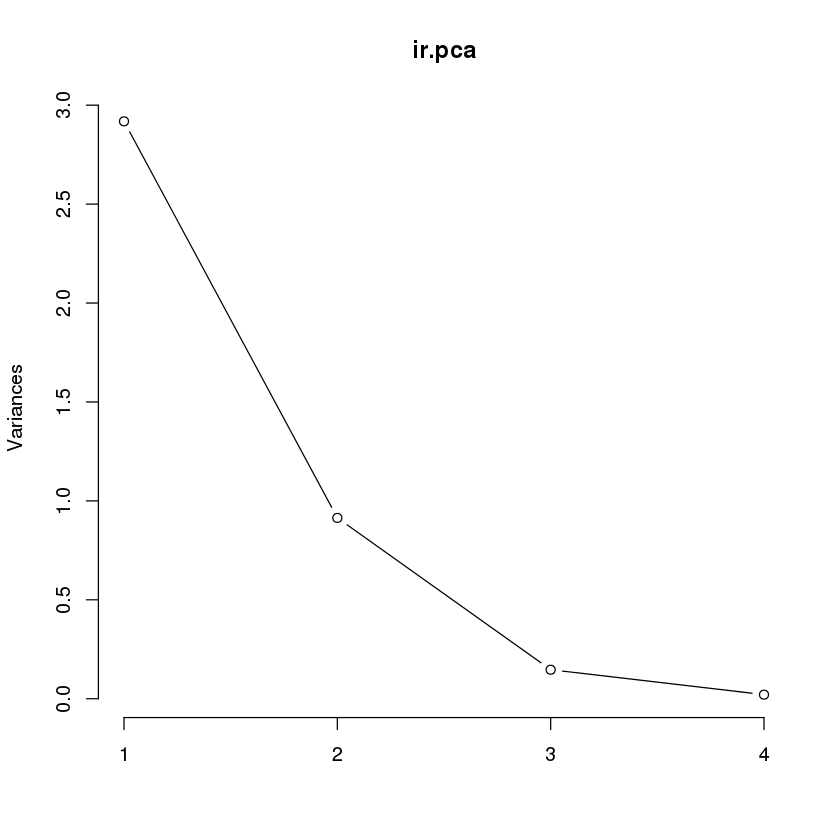

In [11]:
plot(ir.pca, type="l")

<img src="pca.png">

### Classic Multi-Dimensional Scaling

In [12]:
ir.mds <- cmdscale(dist(ir), k = 2)

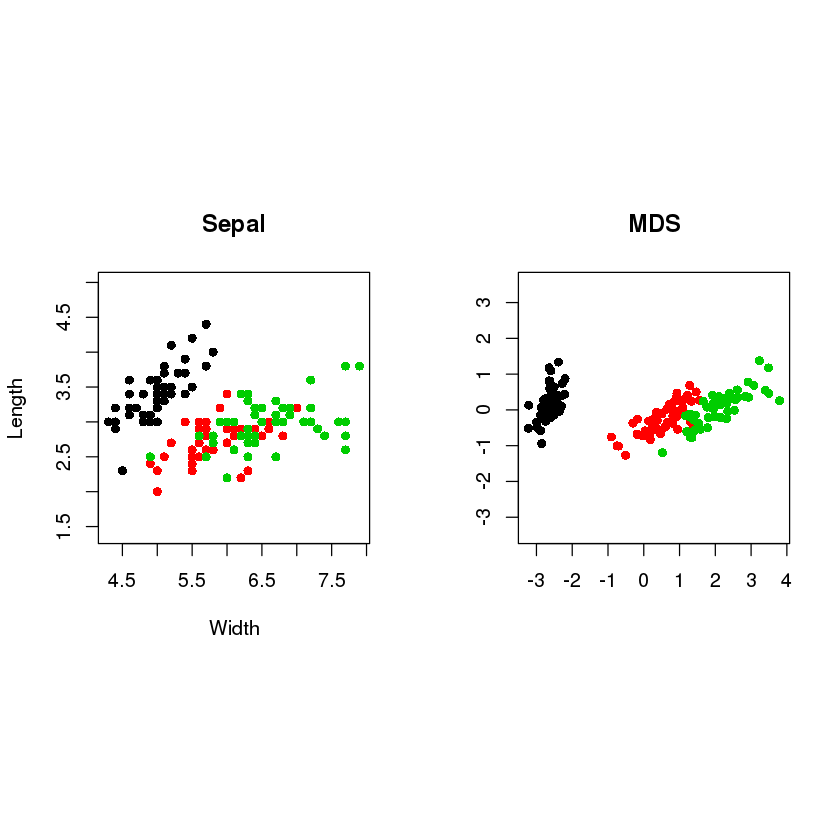

In [13]:
par(mfrow=c(1,2), pty="s")
plot(iris[,1], iris[,2], type = "p", asp = 1, col=iris$Species, pch=16, main="Sepal", xlab="Width", ylab="Length")
plot(ir.mds[,1], ir.mds[,2], type = "p", asp = 1, col=iris$Species, pch=16, main="MDS", xlab="", ylab="")

Clustering
----

### k-means clustering

In [14]:
ir.kmeans <- kmeans(ir, centers=3)

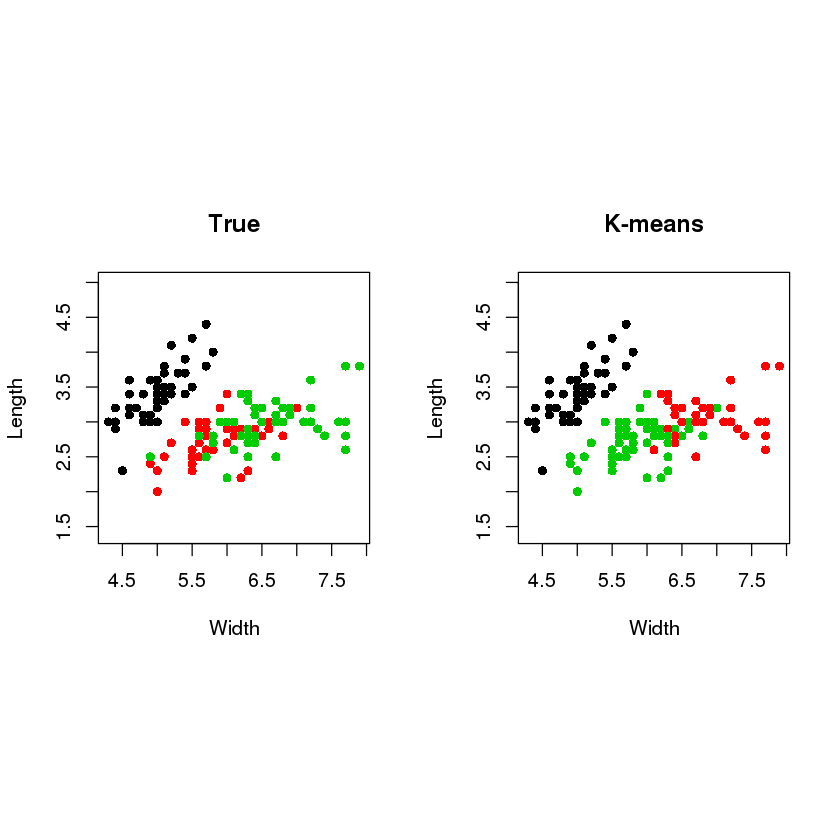

In [16]:
par(mfrow=c(1,2), pty="s")
plot(iris[,1], iris[,2], type = "p", asp = 1, col=iris$Species, pch=16, main="True", xlab="Width", ylab="Length")
pdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA0gAAANICAMAAADKOT/pAAAC91BMVEUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAzQD/AAA7EfghAAAA/XRSTlMAAQIDBAUGBwgJCgsMDQ4PEBESExQVFhcYGRobHB0eHyAhIiMkJSYnKCkqKywtLi8wMTIzNDU3ODk6Ozw9P0BBQkNERUZHSElKS0xNTk9QUVJTVFVWV1hZWltcXV5fYGFiY2RlZmdoaWprbG1ucHFyc3R1dnd4eXp7fH1+f4CBgoWGh4iJiouMjY6PkJGSk5SVlpeYmZqbnJ2en6ChoqOkpaanqKmqq6ytrq+wsbKztLW2t7i5uru8vb6/wMHCw8TFxsfIycrLzM3Oz9DR0tPU1dbX2Nna29zd3t/g4eLj5OXm5+jp6uvs7e7v8PHy8/T19vf4+fr7/P3+////wFrRoQAAAAlwSFlzAAASdAAAEnQB3mYfeAAAIABJREFUeJzt3Xu8HHV98PHZXIU0hFxBQjXiDalRQ6BFEC9RQlFaa7Rp4alQUOlDqvTRPpSiFY0WtU/qYxW8cBFDIhC0iKg1ERpIuQURsOZQYoCSkIT4JBCTnNzI7+SPZ2Z3z2a+u7O/uc98Z/fzfr04e5ud7JkP3905c/ac4zgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABA7t5t/I4t++H0OTdB/bT2Nffcd0aU/GgQA4OkyfAgfcI985MxJT8YxMEgadIcpPe7pw/+TtkPBvENPxOiXI0Op+w25olpZT8WJMAg6VDv8Motxmw6ruyHgiR8g+Sdfdu9e0a1rho+c8pNz+5Zu/TkUh5fv/C29eTHjdk+q/P6Obeu3fXge53fXfyb3973h42r/UlGfeDf1g5uefhLM5rL1/7HAzs23zGzfttLFtyzYdfjP3zvyMI+kX4lB+md+4zpGKTLml9GXVbOI+wP7vYdu9KYve/ovP4Ljc3/sY31kzO8a/1JRi9vXth+gn/5Pce7l474z+Ztd40t+hPqN3KQnjCdg3SKe3LPN3/ufvxgSY+xH7ib90b3vwsCrjdm8476yd7n3A8rnbYkl7snT9018KIxPx5e/rlB98N33UtXG7PrvlsecC99sfDPqM/IQTI3/tWHRshBqt1jzMKaU/u0MetfUtaj7H3NV45bap3X33ecM+pT7un3xzkfMWZrexJ3TL7o3mtm/SZv+Yde64xxJ+jX7qVfG/Na9+Q9xvyq+E+pv8hBukxcVT8zw/042b0w1t3re1spD7EvDH8b4q87r3+De/IS9/TVboSAJO+fP3+qu4P3p41s7scT3ZNjjHnRPXnBmKVzDnNGnHbaqUV/Qv1GDtJ0cVX9zDt932z6RDmPsR94m/fiNe7uW+MAwnsH6o7zrh/ZvH2k0yXJKz989SpvZ645SKPck1rj0hLv2t3LL31TWZ9W/5CDVBNX1c/8la/aleU8xn7gHU1wZu0x5smJ3sXzGhv8+FaM5mlAknHXe6f7H2wNkm/5I7/6QmOxu6eX82n1DzlIw6f1gRpZv+J8dydhoOkfSnqQfaCx8T/mnnzP2/jWQZJJFhmz5hNvOnxM0CC5+4Rz//lxb023l/FJ9ZPgQTrGO/2D+hXuxz28hzJ3jY0/4kf1V6aO6+UgySTPGHO0e3Ji0CC9/vUvdT8e92VjflvEJ9HPAgbpaWNunODU3rq2fsX47cb8T/fatzywevWsbmtBWs2Nf9Rm98uk3++8XgySTLLDmHc6ztSVQYP0pHl0vFM/osdRu5wFDNIyb5d7/S7T/PL1o+7Jqm/e5e6+/6z92CwyM7zx57pnnprUeb1/kGQS74ujJ+7faRp75HJ598un7f+27Bd7jflSoZ9NHwoYpON3N3bQ/7Fxxajrml/XLp9Q1oPsA60O/+Seu63Wcb0YJJHkj+vn9v79PmNOaF9+8trmgg8fXuhn04cCBsl53ffX79247K3O7t2765fPWDYwuO4H7+ErpRy1Nv7Yh92zH++4XgySTDLn7u2/vO4Nzurdu2/tWH7cgruf3vPsfyzgW+kAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMCvduoc+JxadpAANJI0NnJOMhBOKrtIJxq1UdjIebMZU/ZD0GSMeXPZD6ETjQSVjYgkqYxEI0FlIyJJKiPRSFDZiEiSykg0ElQ2IpKkMhKNBJWNiCSpjEQjQWUjIkkqI9FIUNmISJLKSDQSFDX6vdkt5xPJT08kGnWjp9GrX/R/m3hc2Q9HEzWRaNSVmkaOM35iyyXmd8p+NJroiUSjbvQ08vsIkfxURqKRoLIRkSSVkWgkqGxEJEllJBoJKhsRSVIZiUaCykZEklRGopGgshGRJJWRaCSobEQkSWUkGgkqGxFJUhmJRoLKRkSSVEaikaCyEZEklZFoJKhsRCRJZSQaCSobEUlSGYlGgspGRJJURqKRoLIRkSSVkWgkqGxEJEllJBoJKhsRSVIZiUaCykZEklRGopGgshGRJJWRaCSobEQkSWUkGgkqGxFJUhmJRkKhjU6b6X6ozVuxacuKc2q2BYkkFBmJRskUOkhmufvhGmN2bTBmqa0SkYQiI9EomcIHaZ7ZcvYIZ+oSc55lQSIJRQ8SjeIrfJAWm/ne2bHr7rQsSCSh6EGiUXyFD9JDZlL9/Le3WhYkklD0INEovsIHaZmZUT+/dJ1lQSIJRQ8SjeIrdpDWnDnjdHOFd3b69pstCxJJKHSQaJRIsYPk2rXfnOg4F6w3cy0LEkkodJBolEihgzRh9vzLr1u1eY7jrB1cYFuQSEKRkWiUTBnfNK85zlnTrEsQSSghEo1iUvnuEyJJKiPRSFDZiEiSykg0EspqNHFgoO2aEe9+f8vXieRXUiQaxVDWIE0xpu2aGZu2tuwkkl9JkWgUg8q9BnYbJJWRaCSobEQkSWUkGgnlNDryCPvtBUaq/33uov6xhEqJRKNYyhkk0/5VbJvCIg3/pfti/rWkSolEo1gYJCIFo1EshTa63fhZFiw8ku5KRUaiUTKFDtIlB8x/D3jM3oGO71H4EUkoMhKNkil2r+GMLQNv9E7ZbYil0Eg0SqTg3e/pK3d/pEakmIqNRKMkiv46dtRCc9MEPZGcKjQqOhKNEij+gNDcLetO1hPJqUCj4iPRKLYSjqwee89eRZGqoPhINIqrjG9RjLri9qvsSxBJKCESjWJS+TYuIkkqI9FIUNmISJLKSDQSVDYikqQyEo0ElY3yjVSFg6mSykg0ElQ2yjNSNb69J6mMRCNBZSMiSSoj0UhQ2aiISFWqpDISjQSVjYgkqYxEI0FlI3YbJJWRaCSobEQkSWUkGgkqG2UWKShH9RrpjEQjQWWjrCJ1eWKrWiOdkWgkqGyUUaQq7iEEUhmJRoLKRhlHqnwllZFoJKhsRCRJZSQaCSobEUlSGYlGgspG7H9LKiPRSFDZKNsjQtkuWQaVkWgkqGyU3Tf7YjVSW0llJBoJKhsV/kNjRIqPRoKeRmM/+r9bbi0pktJKaiLRqCs1jZxjH1jd8jSR/NREolFXahoJ7DYIKiPRSFDZiEiSykg0ElQ2yieSrYPqRjoj0UhQ2SiXSCHPaHoTKY1EI0FlozIiaaYyEo0ElY1yjVTBSioj0UhQ2YhIkspINBJUNmK3QVIZiUaCykZEklRGopGgslH6SEE5AhtpCjfkCbqkMlJ/NjroCbqkslHqSF2e2AJ/x4aaSkND/knyX1IZqS8bHTzonyT/JZWN0kaKvukVRRoa8s+OuKQyUj82OnjQPzvikspGWUUK3/aKDhP16SBVqhGDlH7J3DFIqZfMHYMUtmSafy0jDFLIkmn+tYz06yBluWT++utgQzUb9dnBhrYDps1LgTn0NOqzQapmo/4cJCMudHtiU5Kobij4kspI/droYPAllY2y3W0IiVQBKiPRSFDZKNsvZE3lK6mMRCNBZSMiSSoj0UgotNFpM90PtXkrNm1ZcU7NtmCekdKsuCRFRqJRMoUOklnufrjGmF0bjFlqq8T+t1BkJBolU/ggzTNbzh7hTF1izrMsaI8UuK0bVxpx4r+py6HVwohj2zEVPUj92kgc246p8EFabOZ7Z8euu9OyoDVS4LNW+zOavL21A5HscWdgqEqD1KeNDlZqkB4yk+rnv73VsqAtUuDrv/ZdA/n+n7iKHqT+bCTf/xNX6kajPr16oCF8WS/SMjOjfn7pOsuCaSOpq1TuINEoipIH6ZMxNoxZc+aM080V3tnp22+2LNhzkcodJBpFUfIgPbH9LSOjLuttvl37zYmOc8F6M9eyYM9FKneQaBRFyYM0uDj6shNmz7/8ulWb5zjO2sEFtgWjRAq8UmmjQ5OU6M5pI9EoknIH6Zefi32XmuOcNc26RIQjQsFXBp5EuHv+yjxqR6NoSj1qd+UjY9KtIEjYN/sCt7F3ZfvuQ/fnxcwea2QJp8hJH4lGUSWcIieDQRr9kztOPjzdKjol/a55YCMtkZJLG4lG+UvTyLYtwkzsOBR7xKKrW1ZmGin4S95E/0A5UkSiUUHSDNKAFOu+Uzq20rSlN7WsJpJfikg0KojKd+hnvNsQGCmTx1kQlZFoJKRu9PlZjdO3/136B9PC/reQNhKN8pd6kMy5jdOFg+kfTEuMdxaboEvyJPA2G3kYtHngOs3x65TSRurFRjJHs1ia49cppWu0YmDAbKzvfD9xYFOE5V9+9f0/PcOZfdPDP7z0JbblYryzWFyyPdv5LoU81clvzA1J4Z9k9lJF6s1GMsdBKfyTzF66QXrq0JYY/Fj44sc97y64/307veX/c7xlwehvP+lyyR4pRG8NUm826rFBcg7tNkRxg7lk0gm/ePH5s8e/fJG50rJgtpGClrTprUFyerJR7w3Sha+Kvuw678eY/6T+1uLa/Y9ZFmSQhLSRerBR7w1SHINXux9mmT/zzn/D9oUvu3ZCkZEq0qj3Bmn4W30P/OAbfxr2Xv3H73c/jLuo/vz4042WBaN/IRscgkESerBR7w2Sf2v8aIR92avMp6Y0z77HLLUsGOOdxYGX5EngkjaxD3/nPGOpv0bqwUZyk0c4/J3zjKV/0+r3Vs+dMumdD95w1Nw15iL7slOeNObD3pk5D5idr7MsGO+dxYcudT7NZfZNPdsrUt6vVqnftNonjWyvSHm/WqUepH/cONE7mbjxMnfP+mchC4+79Hsf8E4vGrx9pm25jL5rnmgdXVR5kPqlUaUHac0NjdMbfu7Uttn2qf0OC9lTz+rtJ4lWEsj2NVLuXz+ljdQnjWxfI+X+9VPqQdq2uHG65AXHeXZ76sfToC9SpQepTxpVe5DufG6qdzLluXucGeYXWTwkR2OkSu/a9UujSu/afcA8MnfSpDMeNue8cpX5X9k8KI3731UepH5pVOlBcr7Q2CBfrZ1rbs/q55nbIslN3rwU2MF2WwS2bS2PgsvJCbwt8CB6Iqkj9VIj24aUR8FlgMDbAg+iJ5LBN81//2v//h9ff4fjvO70yL88LUxgpLb3Egc9o6V8movwrDUk2W4TK0v1opU+Uu80irAhD0q228TKUr1oqfzhy7ZIMkjbrkGWP6Oc3yAF3yEqlZFKapTfIAXfIarUjUZ+MvrvlY5M7SC1zcqQ7TY9g9RLjcI3ZNusHLTdpmiQLk25YQIxSELaSL3UqGcH6fHn3zYq3RoCqB2kau7a9VKjCBvSMkiKd+12L0p3/0AcbBDSRuqlRvkNUskHG55dmO7+gWIcWg08SSrChmxueVlTXtk8kStLMUepI/VUowgbsrnlZQB5ZfNErizFHKUfpIWF/15p8Yxm2YfIhfWlyLJIKmkj9Vkj60uRZZFU0v8YxXUF/15pGcQUXKmSg9Rnjao5SLlsH7WRAr84klcGf/2USnY/2JfRA/KobRT4xZG8Mvjrp1Qy+1HzHL9HITFIsfVXo4oOUi7URqrmrl0u9Daq5q6dx/obOZPwRTLipH5W5OholG+nJIM0JE6CV2tdJItIfdQoySAdFCfBq7Uukr7Ra2/bYZyL/zbTL2aHIzW3vHwiC7wUuKQkN13zkryyOQHyRJK3Ne9uu59tZREXSR2pMo0ibLoIjWRbmSqwe+CVtnV2St3o5Vs37jTO58yDE9KtR5CRbLsE7bsN3ZcMfkoSVw4FClrZ8G2Ne9vuEGNluQ1SZRrJbRC46aI3Gm7rL9UWvG1Jy/5e6BKpB+nrO6YPGGfk35jPpluP0IwUYdsHRwpaspxBirCy8EXSRqpMo3IG6aDltsiLpB6kZ251Brxt8u9r0q3HmfK9n7b8KsdBajtu478ycqTWbUFzpG+QKtNIboPADRO5UStt0BwpHKTd/7cR6eqd6dbjHLHw8y0/ZpD8Ur/XriqN+nmQBr7biPRAVr9Uw9M7u3YRvkbKf5Aq00hugsDtEr2RGKSUXyMVMEjXPj/Zi7TAfCHdeoToX8gGVwpaUMsgda4v9J9LG6kyjbQMUueghI5a6kE69rdrtpkr7zKPZXlstfU9isYmtzQq4PB3c5EIlwKjBq4zYJHWSae0karTSG6ewG0WuD2jpwqcBHlb90VaJ53Sfx/p9fe5m+U3VxyRcjWC9WddMhHjCcr/vNb2U0aWZ6hgtmfQ7lJHqmYj26tOwKvSoVcdcYfYmzx21Losvmk+4Y2Ta6lXIth++jIb5QxS8P8UoTKIVMVG5QxS8P8ToTJ7G9e4I7NZT13hg2Q9iuOfIzFIsbd5eYNUV7FG7XNiu80/R2KQYm/ysgfpO0X9Yo1s9OUgVawRg5Qau3YCg9SxzYIGqTd27XKMlNfBBt8hUcd/WDpgiPyDNNS4w0EnYJDCtv6hqMFH1YPvVYFBKuZgw1C321qDNNTs1bjDkBMwSGEjdahp8Lvugu9ViUFyMm/kBB8ibWpeKW+TJ3IReb8I/2zgk2TXZ84qDFKOjQK3WeBtgVED72cT2Fbe1qkag5Q935OYb79NLNK2T9fx5NexRaPvEwT+e0HXNVRikLIXvOUjLBK0h9d2h/B/PbBm98IMUgmDFPg/RfD/KXUMUvGDdDCoZuCVDf0+SG1vO/UvEneQLFu52z8eemUDg9RtkuIOkmUjtylykIyUeD2dGCQhRaSeaNTrgzQgJV5PJ3bthBSReqFR9znqxV27TGUXqdv/1SGD1Hp/Yq4HGyJcWacyUnaNuv1fHTJIrff55jJIwccVuhdW2SirSLb/r5vbs7mI3LrNK+Vt8iRw1VHnqMsbvbsWVhkpo0a2/68Dt7ztNlvUCP+eFBiza2GVjTKKZHuFkLfJ56nA+3V7XiyCykjZNLJtT3mb7VLbHSLvGWRIZaOMB8n2I4+NSwxSfNkOku1Hh8Mvtd2BQRpW3CC1/bIGcZt/+bY5YpAKHKSgd58G3a21BIM0TN8g8YrUTt8g9c8r0mkz3Q+1eSs2bVlxjvXHzPgaSSgyUsGNbNtT3ma71HaHnh8ks9z9cI0xuzYYs9RWKd9B8h3bPti41G2QxMHWAgYp53d/R1Fwo27b039su/2SvJ+vbyGDlPe7v6PwIs0zW84e4UxdYs6zLJjn4e/mlfJE1gy8snkpvznqPqJFD1KRjQI/abmtA7d885JMHHhllrqPaOGDtNjM986OXXenZcEcv2suX6YOSmLJfF98OukZpLIbBb/4BG0f2957HhQN0kNmUv38t7daFuzHQbLsNRY9SGU3UjtIwf+j1BU+SMvMjPr5pessCxYwSJbfXNzUv4NUdiO5KdoGKeiNxX03SGvOnHG6ucI7O337zZYFGSSh0EFS0IhBCuG9kX/XfnOi41yw3sy1LMiunVDoICloxK5diAmz519+3arNcxxn7eAC24JJIrU/VXVZ7NCmaB4FHxqKOki2mcpg3rrPbZGRCmzUdZsd2vIB7/AWS3aEs3XIYN66z20Z3zSvOc5Z06xLxI8kN7Ltaap5W/Okeb/AO8h12l6esnnp6rqSEiLl3yjC9gw8kWQ42zqzeenquhKV7z6JH0k+Xdle8OW+XPTdN9uS0deSjMpIKRtF2Z6Wl6II/4KU906gykbJI8k3y1nfZMcgpZOykW0+GKToJnb82PP0e1a3PG3Gx1td2kEKrRSpe7zHHF1JkXJtFH+QUjWy/S+RibIGaUrHL+I47MIPt3yn6Fek8Bnow0HKtVEOg2Rr1LODZJfRrl3QkuzaZSSjXTvrkvHmqC937eySHhEa3oQMUv7SNmKQChA/0kG5BS3brLk9myfRJ8C2ZL5zpDNS2sPf3Y/2dzn8Hf9fEPKdo4IbTf7muufvOKl+drntlxXGjhT9+SbvZ6Y8FBopt0bZvLJoVWyj9WbwBTN4hnc+n0EKnw8GyS6/RtH30RikEF8xnx09+o92/uZop/xBqtIkFRkpv0bxB6lKk1ToID2+2vvZ5bPMtxwGKY4iI+XXiEHKzJ6v108Wv3gCXyPFUWSk/BrxNVJmNt1bP3nZjntHJ4vU/e8ptMYjbEZSDFJp01dkpBwbtcYjbEZSDFJp01foIN1gLq6fXmz+eWSCSNY/TSIOatsknaMSX8iKjJRno8hHs5POUYkvZIUO0iu3mfXevveIG83a9bEjRfgbPxFebpK+IpW5S1hkpNwbRXi5SfqKVOYuYbHfR3rNkh1PeacjPvn/rBvbGslyxwhHEhikEHk3inAkgUEKVzuicXrYm8+1LFXAIMWciFIP9hUcKd9GMQYp5kSUerBP5btPFA5S/7wiRaVvkPrqFSmatINkWTW7dhlJO0iWVbNrl5UER4Qashqkzt+kwiC1Sdwoq0Hq/E0qDFK7Lt+jiPCHuSP8zx6+iMzRHKA+OfwdWfJGkYYkbBHZqHmpvDnS2aiAv5htI5/YynwpalIZSVOjMl+KmlQ2UhWJQQqmqRGD1IWiSKUe925SGUlRo6RH+bKkspGmSLwidaGpEYPUhaZIDFIwTY0YpC40RWKQgmlqxCB1UW6kGL9IvBgqI6lqVPoc6WxUdiRtVEaikaCyEZEklZFoJKhsRCRJZSQaCSobEUlSGYlGgspGRJJURqKRoLJRmkglH2DLhcpIKRqVfIAtFyobJY9U/vd88qAyUuJG5X/PJw8qGyWOpOCbp3lQGSlpIwXfPM2DykapB6nHJkllpLSD1GOTpKfRK57d2rIz7p9VbGKQ8pVFIwYpZ6PePqdlEa9IfmoiZdGIQSoQXyMJKiPxNZKgshFH7SSVkThqJ6hslOJ7FL04RzojJW/Ui3OksxHfNZdURqKRoLIRkSSVkWgkqGxEJEllJBoJKhsRSVIZiUaCykZEklRGopGgshGRJJWRaCSobEQkSWUkGgkqGxFJUhmJRoLKRkSSVEaikaCyEZEklZFoJKhsRCRJZSQaCSobEUlSGYlGgspGRJJURqKRoLIRkSSVkWgkqGxEJEllJBoJKhsRSVIZiUaCykZEklRGopGgshGRJJWRaCQU2ui0me6H2rwVm7asOKdmW5BIQpGRaJRMoYNklrsfrjFm1wZjltoqEUkoMhKNkil8kOaZLWePcKYuMedZFiSSUPQg0Si+wgdpsZnvnR277k7LgkQSih4kGsVX+CA9ZCbVz397q2VBIglFDxKN4it8kJaZGfXzS9dZFiSSUPQg0Si+YgdpzZkzTjdXeGenb7/ZsiCRhEIHiUaJFDtIrl37zYmOc8F6M9eyIJGEQgeJRokUOkgTZs+//LpVm+c4ztrBBbYFiSQUGYlGyZTxTfOa45w1zboEkYQSItEoJpXvPiGSpDISjQRFjQ6f2HIJkfz0RKJRN2U1mjgw0HbNcS8an8NLeVRKlRSJRjGUNUhTjGm/aubslvPNmDIelFYlRaJRDHr2GvzeTCQ/lZFoJKhsRCRJZSQaCSobEUlSGYlGgspGRJJURqKRoLIRkSSVkWgkqGxEJEllJBoJhTa6asDPsiCRhCIj0SiZQgfpnF/5v59nWZBIQpGRaJRMsXsNY35sTouyHJGEQiPRKJGCd7/fRaQEio1EoyQKHqSpREqg2Eg0SqLoA0JTRkdZikhCwZFolIDKI6tEklRGopGgshGRJJWRaCSobORGOmpioGNe0X9eOvEojZFo5KO0kXOSgXBS2UU60aiNwkZObdbsQBeYD54b4l+2hi1x7k3/FbrIilWhizzyr6GLPPut0EX2Xhm2xMXmfbNnlR0kAI0O0dqoq1NN6AGlP98QupbLVoUucvXi0EV+vDB0kYGPhC4yaPvVcXVHm+ND16IJjSqASPrRqAKIpB+NKoBI+tGoAoikH40qgEj60agCiKQfjSqASPrRqAKIpB+NKoBI+tGoAk7eNzJskXlPhq7l47Y/1t3wlWtDF/nBp0MXefT80EVeeHvYEpMPHBe6Fk1oVAG1V4cuMvoVoYuMOyZ0kUlTQhc5+ojQRV42NnSRV40IXeQ1oUuoQiMAAAAAAAAAAAAAAAAAAAAAAAAA6AWX3H7o/ITmb/+P9Acau94p0Voc54y7dz79tUM/UZZkLUe3/n7Bm9I9FmVopN+7Dvj+UP1ss2a5Z2acNXTcKdFanPPNc4tXmtWtP7GVZC2Tljds2feyVI9FGRrpN/0544s035wZfxUdd0q0lnHbnzraqX3Z/EWqtTS8atenMliLGjTSb9TKgf/2RbrczIi/jo47JVrLX5oPuR+nf/H9qdZSN+Kuh1q/bSf5WtSgUQUs3P3GAV+k63adfsvqG/4k3jo67pRoLT80U0NWG9lF+w/tJCRfixo00m+uucjxR1q1v/5V37dqcVbScadEa3lkx9QbNj9x1cR0j8Uzads3LA+ucmik37Fbbq6JSJvNZ14x+c+3mPfFWUvHnRKtZdPmB8yGF81TE1KtxXPl7t+1PLiqoZF+o+5Z524SX6TanBO9k7PNihhr6bhTorU4+8yKlzpH3ma+lGotrmMHF1keXNXQqAKu2HuyIyI1jRjcFH9lHXeKuZbnDhzlfpx64LG0j+VzAb/jNtFnpAKNKuD21rfGjpQ3bNiSYG0dd4q3lkfW10/W70y1FscZvfHegGsTfUYa0KgCrhrw7DUDA81fP3vW2gu8kymxXmQ77pRoLc6N+8e7Hw/b90iqtTjOH7lfm1seXNXQqDKauw1TJjrOtN3PHOM4Y28058a4v7hT4rUGKGGnAAADn0lEQVQ4p5mrRjq1L5mFqdbiONea4d9+nWYtytCoApqRzID7YYF5Ycn1vzbfjXUg0n+n5Gup3WEe/dZq89jhqdbi1DZsGL5DirVoQ6MK8Edy5t7y5LaV58f8jHx3SrGWwz9z/45HFx6eci0nmJuGz6ZYizY0AgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACFLjFfqZ/+3HzUOxmxzUzz/7X7xp9s8/iuRLFoVAGzzWrvZPIBc5t3erxZ4xBJGRpVwKjt+7y/Ofo+s2f7aPf0g+Zqx5l6dOvmeqSnvD8MT6TS0KgK7jBvcT9+1XzZnFo/PUfcWo9U/0Ck8tCoAi41f+t+fPzRPzD/4J4+ZF7mOH/58datRNKARhVwirnVcY41i0a9cLfjHLbvSafRo/ahe1741VfGuX0uNK7Pu1eOvvKxXY///aiyH3AfolEFjNm1seb8hXmP8/19451TzfVOI9L1Ztuypb950I30qnPNxnNnuVf+5NHP37i9/pyIYtGoClaYlzvXvzjBWWDe7fyNudCpRzrDrJnuOEc95t9t+NEYx3lL4wASikWjCviUmV975j7Hea1Z5NxkXuPUI11jzvZue7c/0snux5GHjrWiODSqgLeaRa8xC9097md+6Ty9qebUI91rpni3TfVH8g7BOkQqA40q4LA9911k3uGeudbMMjd517iRVjYiTe44IkSkMtCoCu7ee9vuw9zTc8zNZoF3hdvjm43dhrOIpAONKuCz5sDPvNOjzQHzBu+M2+MdZsD9Qnbao41ITzhEKheNKuBdxlxeP/OY2TbCO/V6XGu23bJky631JoMHFr6dSKWiUQWM329OqZ/5P+YH9dP6N/suvPv5gS+Orjf52HO7/45IpaIRAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPj8fwE7k1EIS67MAAAAAElFTkSuQmCClot(iris[,1], iris[,2], type = "p", asp = 1, col=ir.kmeans$cluster, pch=16, 
     main="K-means", xlab="Width", ylab="Length")

### What if you guess the number of clusters wrongly?

In [19]:
ir.kmeans <- kmeans(ir, centers=6)

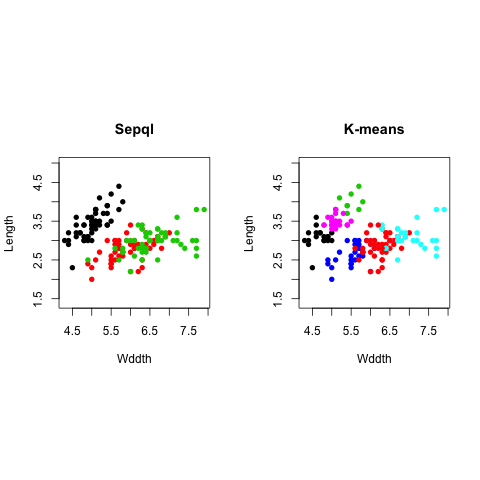

In [20]:
par(mfrow=c(1,2), pty="s")
plot(iris[,1], iris[,2], type = "p", asp = 1, col=iris$Species, pch=16, main="True", xlab="Wddth", ylab="Length")
plot(iris[,1], iris[,2], type = "p", asp = 1, col=ir.kmeans$cluster, pch=16, 
     main="K-means", xlab="Wddth", ylab="Length")

### Agglomerative Hiearchical Clustering

In [17]:
ir.ahc <- hclust(dist(ir), method = "complete")

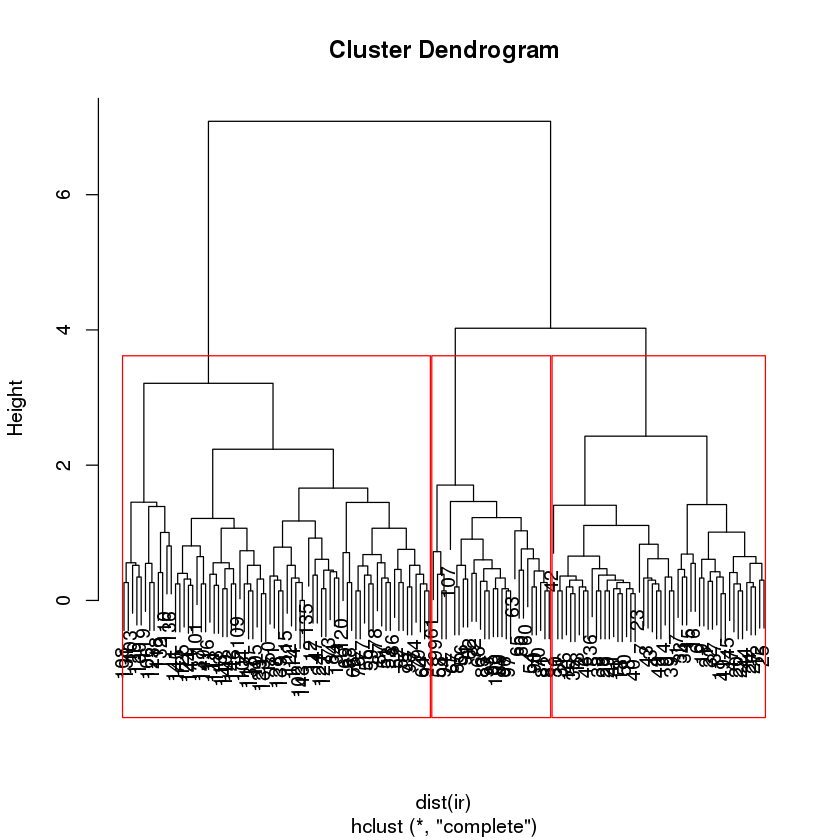

In [18]:
plot(ir.ahc)
rect.hclust(ir.ahc, k=3, border = "red")

In [20]:
groups <- cutree(ir.ahc, k=3)

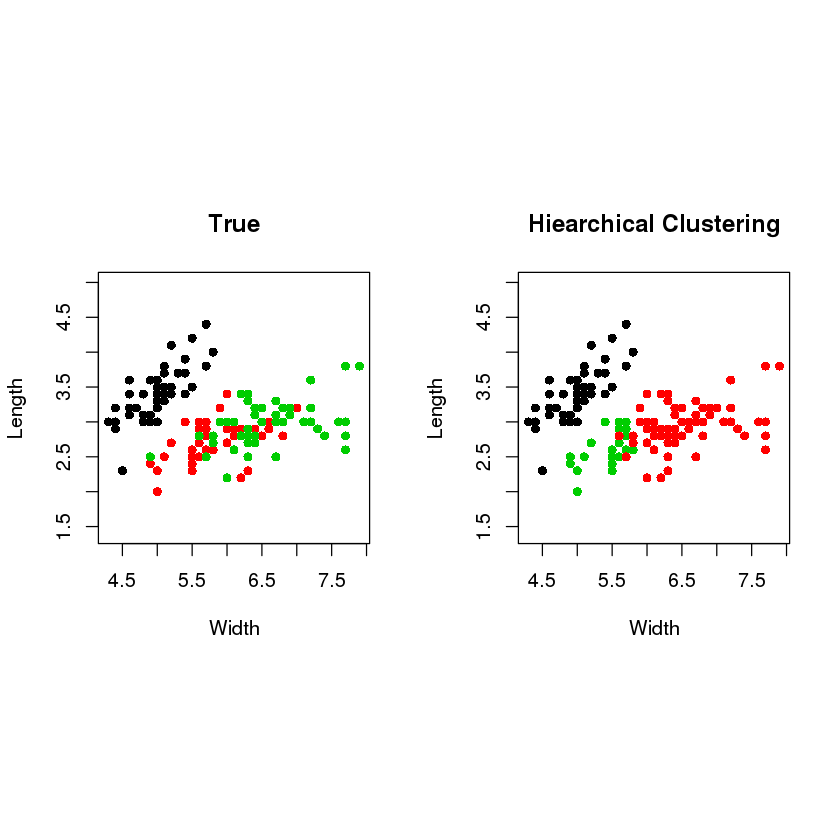

In [21]:
par(mfrow=c(1,2), pty="s")
plot(iris[,1], iris[,2], type = "p", asp = 1, col=iris$Species, pch=16, main="True", xlab="Width", ylab="Length")
plot(iris[,1], iris[,2], type = "p", asp = 1, col=groups, pch=16, 
     main="Hiearchical Clustering", xlab="Width", ylab="Length")

Heatmaps
----

Heatmaps are a grpahical means of displaying the results of agglomerative hierarchical clustering and a matrix of values (e.g. gene expression).

In [10]:
library(heatmap)

ERROR: Error in library(heatmap): there is no package called ‘heatmap’


In [23]:
pheatmap(mtcars, scale="column")

ERROR: Error in eval(expr, envir, enclos): could not find function "pheatmap"
